<a href="https://colab.research.google.com/github/Mhmd-sh3rawy/NTI_ML_notebooks/blob/main/Week_3/first_day/KNN/iris_KNN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocess data



In [15]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Train initial knn model



In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Fine-tune knn model


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_

Best parameters: {'n_neighbors': 3}


## Evaluate model


In [19]:
from sklearn.metrics import accuracy_score

y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best KNN model on the test set: {accuracy}")

Accuracy of the best KNN model on the test set: 1.0


## Visualize results



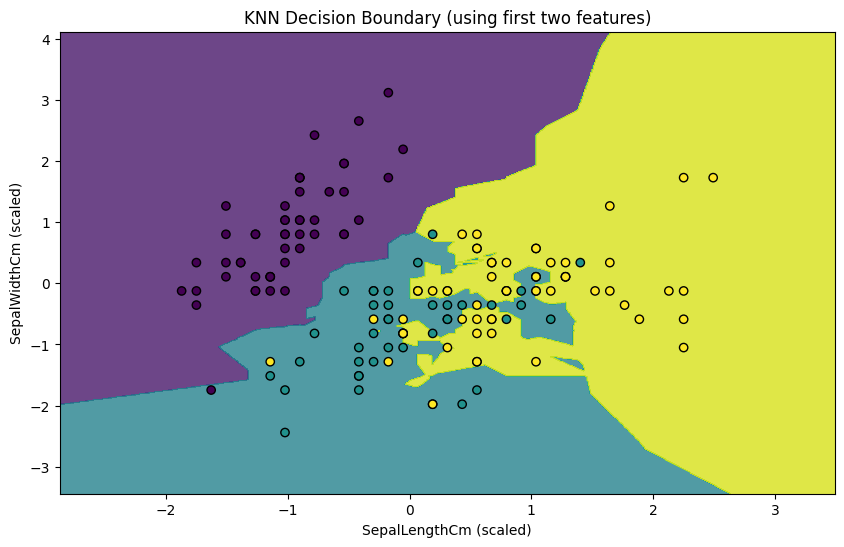

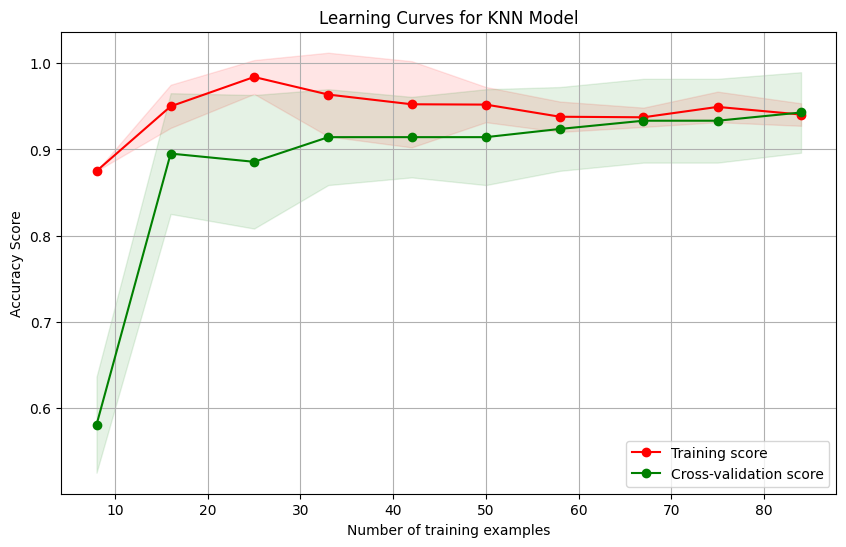

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Visualize decision boundary (using the first two features for simplicity)
X_2d = X_scaled[:, :2]
best_knn_model_2d = KNeighborsClassifier(n_neighbors=best_knn_model.n_neighbors)
best_knn_model_2d.fit(X_2d, y)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_knn_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Get the unique categories and their codes from y
categories = y.astype('category').cat.categories
codes = y.astype('category').cat.codes.unique()
category_to_code = dict(zip(categories, codes))

# Convert predicted labels in Z to numerical representations using the mapping
Z_numeric = np.array([category_to_code[label] for label in Z])
Z_numeric = Z_numeric.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y.astype('category').cat.codes, edgecolors='k', marker='o')
plt.title('KNN Decision Boundary (using first two features)')
plt.xlabel('SepalLengthCm (scaled)')
plt.ylabel('SepalWidthCm (scaled)')
plt.show()

# Visualize learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.title("Learning Curves for KNN Model")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()